<a href="https://colab.research.google.com/github/raviyadav44/Computer-vision-projects/blob/main/Hyperparameter_Tuning_and_Optimization_using_Tensorflow_for_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the required libraries

In [ ]:
!pip install tensorflow_datasets

     |████████████████████████████████| 3.1 MB 3.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import LearningRateScheduler,TensorBoard,ReduceLROnPlateau
import matplotlib.pyplot as plt
from keras.utils import plot_model
import tensorflow_datasets as tfds
import tensorflow as tf
%matplotlib inline

Using TensorFlow backend.


In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Plot 100 image in 10 x 10 Matrix

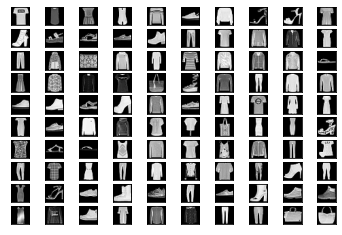

In [ ]:
fig = plt.figure()
for i in range(1,101):
  ax1 = fig.add_subplot(10,10,i)
  plt.xticks([])
  plt.yticks([])
  ax1.imshow(x_train[i].reshape(28,28),cmap = 'gray')

### Display all unique labels in the dataset. There are 10 unique labels

In [ ]:
print('This unique labels are: ',np.unique(y_train))

This unique labels are:  [0 1 2 3 4 5 6 7 8 9]


### Number of observations in training and testing dataset.

In [ ]:
print('Number of training examples: ',x_train.shape[0])
print('Number of testing examples: ',x_test.shape[0])

Number of training examples:  60000
Number of testing examples:  10000


### Displaying shape of each image that is 28x 28

In [ ]:
print('Size of each example is: ',x_train[0].shape)

Size of each example is:  (28, 28)


In [ ]:
(ds_train,d_info) = tfds.load('fashion_mnist', split='train[:80%]',with_info=True,
                               as_supervised=True)

(ds_valid,d_info) = tfds.load('fashion_mnist', split='train[-20%:]',with_info=True,
                               as_supervised=True)
(ds_test,d_info) = tfds.load('fashion_mnist',split = 'test',with_info=True,
                               as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteMZFJ8F/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteMZFJ8F/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


### Normalize the image and reshaping it. Also we splitting the data into Training / Validation / Testing

In [ ]:
def normalize_img(image, label):
  image = tf.reshape(image,(784,))
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


ds_valid = ds_valid.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_valid = ds_valid.batch(128)
ds_valid = ds_valid.cache()
ds_valid = ds_valid.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

training_epochs = 1000

### Defining Model 1

In [ ]:
model1 = Sequential()
model1.add(Dense(32,kernel_initializer = 'normal', input_dim=784,activation='relu'))
model1.add(Dense(64,kernel_initializer = 'normal',activation = 'relu'))
model1.add(Dense(128,kernel_initializer = 'normal',activation = 'relu'))
model1.add(Dense(10,activation='softmax'))
# Compile model
adam1 = optimizers.Adam(lr = 0.0001)
model1.compile(loss='sparse_categorical_crossentropy', optimizer=adam1, metrics=['accuracy'])

history1 = model1.fit(ds_train,validation_data = ds_valid, epochs = training_epochs)

Epoch 1/1000
375/375 [==============================] - 17s 44ms/step - loss: 1.4574 - accuracy: 0.5440 - val_loss: 0.8404 - val_accuracy: 0.6768
Epoch 2/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.7475 - accuracy: 0.7167 - val_loss: 0.6652 - val_accuracy: 0.7573
Epoch 3/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.6271 - accuracy: 0.7740 - val_loss: 0.5798 - val_accuracy: 0.7910
Epoch 4/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.5626 - accuracy: 0.7995 - val_loss: 0.5349 - val_accuracy: 0.8090
Epoch 5/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.5245 - accuracy: 0.8161 - val_loss: 0.5071 - val_accuracy: 0.8196
Epoch 6/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.4990 - accuracy: 0.8267 - val_loss: 0.4877 - val_accuracy: 0.8263
Epoch 7/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.4801 - accuracy: 0.8324 - val_loss: 0.4730 - val_accurac

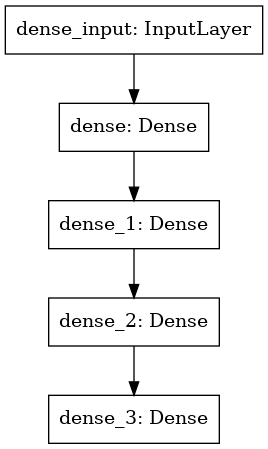

In [ ]:
tf.keras.utils.plot_model(
    model1, to_file='model1.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
testing_loss1,testing_acc1 = model1.evaluate(ds_test)

print('Testing loss of this model is ',testing_loss1)
print('Testing Accuracy of this model is ',testing_acc1)

     79/Unknown - 2s 28ms/step - loss: 1.5648 - accuracy: 0.8489Testing loss of this model is  1.5648151673848116
Testing Accuracy of this model is  0.8489


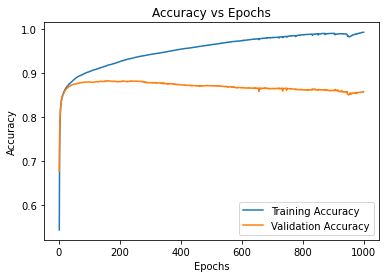

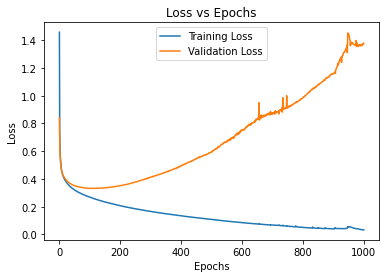

In [ ]:
values1 = history1.history

training_accuracy_1 = values1['accuracy']
training_loss_1 = values1['loss']
validation_accuracy_1 = values1['val_accuracy']
val_loss_1 = values1['val_loss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_1,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_1,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_1,label = 'Training Loss')
plt.plot(epochs,val_loss_1, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Defining Model 2

In [ ]:
model2 = Sequential()
model2.add(Dense(32, input_dim=784,activation='relu'))
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(128,activation = 'relu'))
model2.add(Dense(10,activation='softmax'))
# Compile model


def scheduler(epoch):
  if epoch < 800:
    return 0.001
  else:
    return 0.01 * tf.math.exp(0.1 * (200 - epoch))

callback = LearningRateScheduler(scheduler)


model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(ds_train,validation_data = ds_valid,epochs = training_epochs,callbacks=[callback])

Epoch 1/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.6492 - accuracy: 0.7728 - val_loss: 0.4744 - val_accuracy: 0.8278
Epoch 2/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.4387 - accuracy: 0.8441 - val_loss: 0.4099 - val_accuracy: 0.8514
Epoch 3/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3931 - accuracy: 0.8593 - val_loss: 0.3847 - val_accuracy: 0.8627
Epoch 4/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3652 - accuracy: 0.8678 - val_loss: 0.3657 - val_accuracy: 0.8695
Epoch 5/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3469 - accuracy: 0.8747 - val_loss: 0.3571 - val_accuracy: 0.8704
Epoch 6/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.3320 - accuracy: 0.8792 - val_loss: 0.3469 - val_accuracy: 0.8752
Epoch 7/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3199 - accuracy: 0.8829 - val_loss: 0.3395 - val_accuracy:

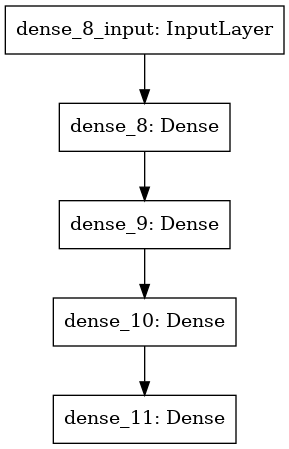

In [ ]:
tf.keras.utils.plot_model(
    model2, to_file='model2.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
testing_loss2,testing_acc2 = model2.evaluate(ds_test)

print('Testing loss of this model is ',testing_loss2)
print('Testing Accuracy of this model is ',testing_acc2)

     79/Unknown - 0s 3ms/step - loss: 3.6476 - accuracy: 0.8555Testing loss of this model is  3.6475723861139033
Testing Accuracy of this model is  0.8555


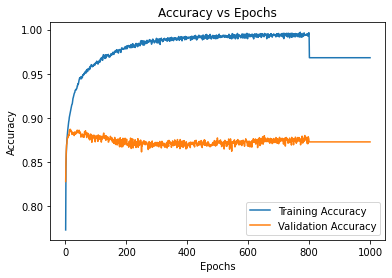

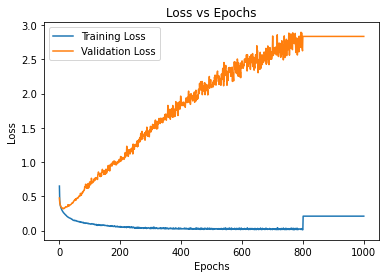

In [ ]:
values2 = history2.history

training_accuracy_2 = values2['accuracy']
training_loss_2 = values2['loss']
validation_accuracy_2 = values2['val_accuracy']
val_loss_2 = values2['val_loss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_2,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_2,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_2,label = 'Training Loss')
plt.plot(epochs,val_loss_2, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Defining Model 3

In [ ]:
model3 = Sequential()
model3.add(Dense(128, input_dim=784,activation='relu'))
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(128,activation = 'relu'))
model3.add(Dense(128,activation = 'relu'))
model3.add(Dense(10,activation='softmax'))


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.18,
                              patience=50, min_lr=0.001)


model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history3 = model3.fit(ds_train,validation_data = ds_valid,epochs = training_epochs , callbacks=[reduce_lr])

Epoch 1/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.5859 - accuracy: 0.7932 - val_loss: 0.4389 - val_accuracy: 0.8422
Epoch 2/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.4021 - accuracy: 0.8549 - val_loss: 0.3719 - val_accuracy: 0.8637
Epoch 3/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.3617 - accuracy: 0.8676 - val_loss: 0.3398 - val_accuracy: 0.8767
Epoch 4/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.3310 - accuracy: 0.8791 - val_loss: 0.3306 - val_accuracy: 0.8792
Epoch 5/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.8874 - val_loss: 0.3155 - val_accuracy: 0.8857
Epoch 6/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.2931 - accuracy: 0.8920 - val_loss: 0.3208 - val_accuracy: 0.8856
Epoch 7/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.2812 - accuracy: 0.8958 - val_loss: 0.3041 - val_accuracy:

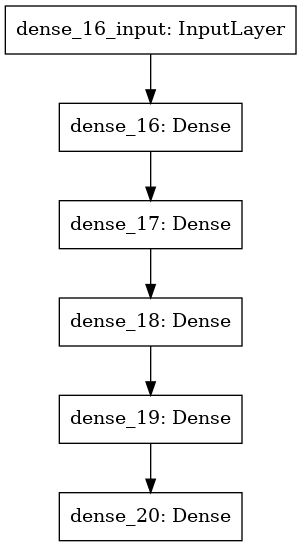

In [ ]:
tf.keras.utils.plot_model(
    model3, to_file='model3.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
testing_loss3,testing_acc3 = model3.evaluate(ds_test)

print('Testing loss of this model is ',testing_loss3)
print('Testing Accuracy of this model is ',testing_acc3)

     79/Unknown - 0s 3ms/step - loss: 2.5039 - accuracy: 0.8864Testing loss of this model is  2.503912185566335
Testing Accuracy of this model is  0.8864


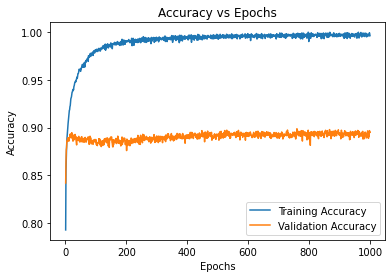

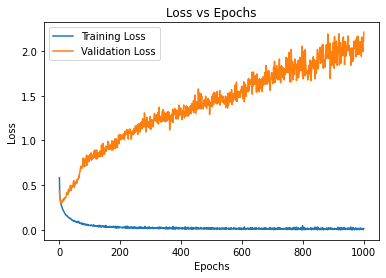

In [ ]:
values3 = history3.history

training_accuracy_3 = values3['accuracy']
training_loss_3 = values3['loss']
validation_accuracy_3 = values3['val_accuracy']
val_loss_3 = values3['val_loss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_3,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_3,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_3,label = 'Training Loss')
plt.plot(epochs,val_loss_3, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Defining Model 4

In [ ]:
model4 = Sequential()
model4.add(Dense(16, input_dim=784,activation='relu'))
model4.add(Dense(64,activation = 'relu'))
model4.add(Dense(128,activation = 'relu'))
model4.add(Dense(32,activation = 'relu'))
model4.add(Dense(128,activation = 'relu'))
model4.add(Dense(10,activation='softmax'))


def scheduler4(epoch):
    if epoch < 800:
        return 0.001
    else:
        return 0.01 * tf.math.exp(0.5 * (10 - epoch))

callback4 = LearningRateScheduler(scheduler4)

model4.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history4 = model4.fit(ds_train,validation_data = ds_valid,epochs = training_epochs, callbacks=[callback4])

Epoch 1/1000
375/375 [==============================] - 3s 8ms/step - loss: 0.7353 - accuracy: 0.7250 - val_loss: 0.5166 - val_accuracy: 0.8075
Epoch 2/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.4887 - accuracy: 0.8219 - val_loss: 0.5124 - val_accuracy: 0.8142
Epoch 3/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.4315 - accuracy: 0.8412 - val_loss: 0.4908 - val_accuracy: 0.8209
Epoch 4/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3994 - accuracy: 0.8527 - val_loss: 0.4583 - val_accuracy: 0.8355
Epoch 5/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3778 - accuracy: 0.8604 - val_loss: 0.4509 - val_accuracy: 0.8369
Epoch 6/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3612 - accuracy: 0.8664 - val_loss: 0.4476 - val_accuracy: 0.8403
Epoch 7/1000
375/375 [==============================] - 2s 5ms/step - loss: 0.3474 - accuracy: 0.8712 - val_loss: 0.4466 - val_accuracy:

In [ ]:
testing_loss4,testing_acc4 = model4.evaluate(ds_test)

print('Testing loss of this model is ',testing_loss4)
print('Testing Accuracy of this model is ',testing_acc4)

     79/Unknown - 0s 4ms/step - loss: 7.7062 - accuracy: 0.7979Testing loss of this model is  7.706168833412701
Testing Accuracy of this model is  0.7979


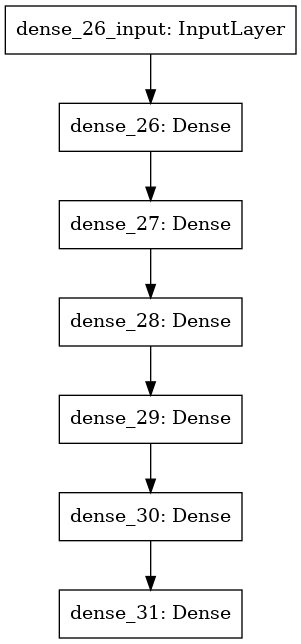

In [ ]:
tf.keras.utils.plot_model(
    model4, to_file='model4.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

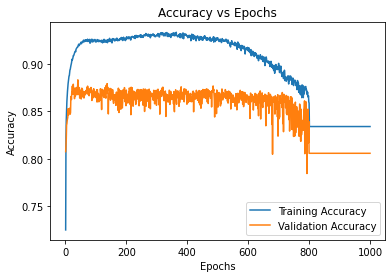

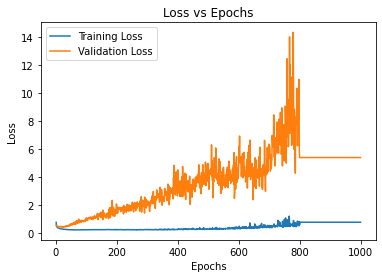

In [ ]:
values4 = history4.history

training_accuracy_4 = values4['accuracy']
training_loss_4 = values4['loss']
validation_accuracy_4 = values4['val_accuracy']
val_loss_4 = values4['val_loss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_4,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_4,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_4,label = 'Training Loss')
plt.plot(epochs,val_loss_4, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Defining Model 5

In [ ]:
model5 = Sequential()
model5.add(Dense(16, input_dim=784,activation='relu'))
model5.add(Dense(64,activation = 'relu'))
model5.add(Dense(128,activation = 'relu'))
model5.add(Dense(32,activation = 'relu'))
model5.add(Dense(10,activation='softmax'))


adagrad = optimizers.Adagrad(lr = 0.001)

model5.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])

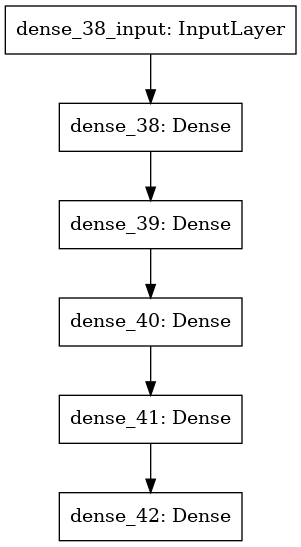

In [ ]:
tf.keras.utils.plot_model(
    model5, to_file='model5.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
history5 = model5.fit(ds_train,validation_data = ds_valid,epochs = training_epochs)

Epoch 1/1000
375/375 [==============================] - 3s 8ms/step - loss: 2.2267 - accuracy: 0.2022 - val_loss: 2.1011 - val_accuracy: 0.2633
Epoch 2/1000
375/375 [==============================] - 2s 4ms/step - loss: 1.8807 - accuracy: 0.3352 - val_loss: 1.6561 - val_accuracy: 0.4187
Epoch 3/1000
375/375 [==============================] - 2s 4ms/step - loss: 1.4893 - accuracy: 0.4577 - val_loss: 1.3395 - val_accuracy: 0.5052
Epoch 4/1000
375/375 [==============================] - 2s 4ms/step - loss: 1.2298 - accuracy: 0.6081 - val_loss: 1.1241 - val_accuracy: 0.6413
Epoch 5/1000
375/375 [==============================] - 2s 4ms/step - loss: 1.0550 - accuracy: 0.6409 - val_loss: 0.9824 - val_accuracy: 0.6579
Epoch 6/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.9430 - accuracy: 0.6559 - val_loss: 0.8941 - val_accuracy: 0.6741
Epoch 7/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.8746 - accuracy: 0.6689 - val_loss: 0.8400 - val_accuracy:

In [ ]:
testing_loss5,testing_acc5 = model5.evaluate(ds_test)

print('Testing loss of this model is ',testing_loss5)
print('Testing Accuracy of this model is ',testing_acc5)

     79/Unknown - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8566Testing loss of this model is  0.40665168211429936
Testing Accuracy of this model is  0.8566


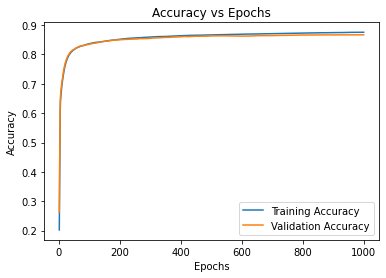

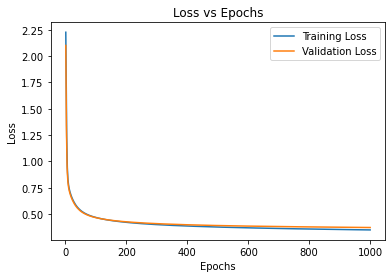

In [ ]:
values5 = history5.history

training_accuracy_5 = values5['accuracy']
training_loss_5 = values5['loss']
validation_accuracy_5 = values5['val_accuracy']
val_loss_5 = values5['val_laoss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_5,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_5,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_5,label = 'Training Loss')
plt.plot(epochs,val_loss_5, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Defining Model 6

In [ ]:
model6 = Sequential()
model6.add(Dense(16, input_dim=784,activation='relu'))
model6.add(Dense(64,activation = 'relu'))
model6.add(Dense(128,activation = 'relu'))
model6.add(Dense(256,activation = 'relu'))
model6.add(Dense(10,activation='softmax'))


opt = optimizers.SGD(lr=1e-2, momentum=0.9)

model6.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

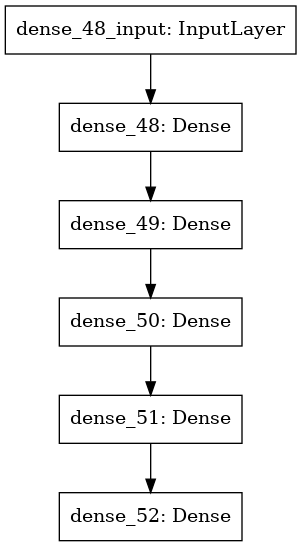

In [ ]:
tf.keras.utils.plot_model(
    model6, to_file='model6.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
history6 = model6.fit(ds_train,validation_data = ds_valid,epochs = training_epochs)

Epoch 1/1000
375/375 [==============================] - 2s 6ms/step - loss: 0.8359 - accuracy: 0.6991 - val_loss: 0.5170 - val_accuracy: 0.8202
Epoch 2/1000
375/375 [==============================] - 2s 4ms/step - loss: 0.4810 - accuracy: 0.8303 - val_loss: 0.4529 - val_accuracy: 0.8382
Epoch 3/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.4339 - accuracy: 0.8453 - val_loss: 0.4272 - val_accuracy: 0.8441
Epoch 4/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8549 - val_loss: 0.4184 - val_accuracy: 0.8477
Epoch 5/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3881 - accuracy: 0.8602 - val_loss: 0.4021 - val_accuracy: 0.8541
Epoch 6/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3735 - accuracy: 0.8650 - val_loss: 0.3840 - val_accuracy: 0.8615
Epoch 7/1000
375/375 [==============================] - 1s 4ms/step - loss: 0.3616 - accuracy: 0.8690 - val_loss: 0.3768 - val_accuracy:

In [ ]:
testing_loss6,testing_acc6 = model6.evaluate(ds_test)

print('Testing loss of this model is ',testing_loss6)
print('Testing Accuracy of this model is ',testing_acc6)

     79/Unknown - 0s 3ms/step - loss: 3.0512 - accuracy: 0.8430Testing loss of this model is  3.051212847987308
Testing Accuracy of this model is  0.843


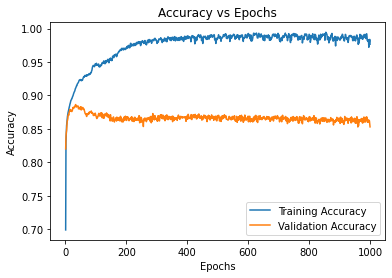

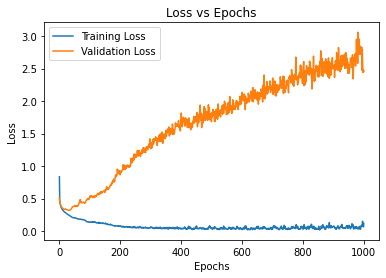

In [ ]:
values6 = history6.history

training_accuracy_6 = values6['accuracy']
training_loss_6 = values6['loss']
validation_accuracy_6 = values6['val_accuracy']
val_loss_6 = values6['val_loss']
epochs = range(1,training_epochs+1)

plt.plot(epochs,training_accuracy_6,label = 'Training Accuracy')
plt.plot(epochs,validation_accuracy_6,label = 'Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,training_loss_6,label = 'Training Loss')
plt.plot(epochs,val_loss_6, label = 'Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()